### Imports and loading data

In [ ]:
import pandas as pd
import numpy as np
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [ ]:
dataset_1 = pd.read_csv("dataset_1.csv")

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
dataset_1 = dataset_1[['Negative_Review', 'Positive_Review', 'Reviewer_Score']]

dataset_1[['Negative_Review']] = dataset_1[['Negative_Review']].replace(to_replace="No Negative", value="")

dataset_1[['Positive_Review']] = dataset_1[['Positive_Review']].replace(to_replace="No Positive", value="")

dataset_1["Review_Text"] = dataset_1['Negative_Review'] + " " + dataset_1['Positive_Review']

dataset_1 = dataset_1.drop(columns=['Negative_Review', 'Positive_Review'])

dataset_1['Review_Text'] = dataset_1['Review_Text'].apply(lambda x: x.lower())

def remove_numbers(text):
    text = ''.join(word for word in text if not word.isdigit())
    return text

dataset_1['Review_Text'] = dataset_1['Review_Text'].apply(remove_numbers)

for punctuation in string.punctuation:
    dataset_1['Review_Text'] = dataset_1['Review_Text'].replace(punctuation, '') 
    
def custom_stopwords():
    """create custom stopwords list excluding negative words"""
    negative_words = ['no',
    'nor',
    'not',
    "don't",
    'should',
    "should've",
    'aren',
    "aren't",
    'couldn',
    "couldn't",
    'didn',
    "didn't",
    'doesn',
    "doesn't",
    'hadn',
    "hadn't",
    'hasn',
    "hasn't",
    'haven',
    "haven't",
    'isn',
    "isn't",
    "wasn't",
    'weren',
    "weren't",
    'won',
    "won't",
    'wouldn',
    "wouldn't"]
    custom_stopwords = [x for x in stopwords.words('english') if x not in negative_words]
    return custom_stopwords

custom_stopwords = custom_stopwords()

stop_words = custom_stopwords
dataset_1['reviews'] = dataset_1['Review_Text'].map(word_tokenize)
dataset_1['reviews'] = dataset_1['reviews'].map(lambda x: [w for w in x if not w in stop_words])

lemmatizer = WordNetLemmatizer()

def lemmatizing(text):
    lemmatized = [lemmatizer.lemmatize(word) for word in text]
    text = lemmatized
    text = ' '.join(word for word in text)
    return text

dataset_1['reviews'] = dataset_1['reviews'].apply(lemmatizing)

dataset_1['review_score'] = dataset_1['Reviewer_Score'] # / 10

dataset_1 = dataset_1.drop(columns=['Review_Text', 'Reviewer_Score'])

dataset_1['review_score'] = dataset_1['review_score'].round(decimals=2)

,reviews,review_score
0,angry made post available via possible site us...,2.9
1,no real complaint hotel great great location s...,7.5
2,room nice elderly bit difficult room two story...,7.1
3,room dirty afraid walk barefoot floor looked n...,3.8
4,booked company line showed picture room though...,6.7
...,...,...
515733,no trolly staff help take luggage room location,7.0
515734,hotel look like surely not breakfast ok got ea...,5.8
515735,ac useless hot week vienna gave hot air,2.5
515736,room enormous really comfortable believe famil...,8.8


------------------------------------- NEW FILE --------------------------

# Import CSV

In [ ]:
#data = pd.read_csv("../raw_data/clean_dataset_1.csv", index_col=0)
data = dataset_1
data

,reviews,review_score
0,angry made post available via possible site us...,2.9
1,no real complaint hotel great great location s...,7.5
2,room nice elderly bit difficult room two story...,7.1
3,room dirty afraid walk barefoot floor looked n...,3.8
4,booked company line showed picture room though...,6.7
...,...,...
515733,no trolly staff help take luggage room location,7.0
515734,hotel look like surely not breakfast ok got ea...,5.8
515735,ac useless hot week vienna gave hot air,2.5
515736,room enormous really comfortable believe famil...,8.8


# Remove less than 5 words

In [ ]:
data['length'] = data['reviews'].apply(lambda x: len(word_tokenize(str(x))))
data.drop(data[data['length'] < 6].index, inplace=True)
data.drop(columns=['length'], inplace=True)
data.reset_index(drop=True, inplace=True)
data

,reviews,review_score
0,angry made post available via possible site us...,2.9
1,no real complaint hotel great great location s...,7.5
2,room nice elderly bit difficult room two story...,7.1
3,room dirty afraid walk barefoot floor looked n...,3.8
4,booked company line showed picture room though...,6.7
...,...,...
421649,no trolly staff help take luggage room location,7.0
421650,hotel look like surely not breakfast ok got ea...,5.8
421651,ac useless hot week vienna gave hot air,2.5
421652,room enormous really comfortable believe famil...,8.8


#  NEURAL NETWORK

In [ ]:
df_1 = data[data['review_score'] < 5][:5000]

In [ ]:
df_2 = data[(data['review_score'] > 5) & (data['review_score'] <8)][:5000]

In [ ]:
df_3 = data[(data['review_score'] > 8) & (data['review_score'] <9)][:5000]

In [ ]:
df_4 = data[(data['review_score'] > 9) & (data['review_score'] < 10.1)][:5000]

In [ ]:
pd.concat([df_1,df_2,df_3,df_4])

,reviews,review_score
0,angry made post available via possible site us...,2.9
3,room dirty afraid walk barefoot floor looked n...,3.8
6,cleaner not change sheet duvet everyday made b...,4.6
12,floor room filfy dirty basic room yr old tv ro...,4.6
21,room overrated disaster room dirty smelly hot ...,3.8
...,...,...
12330,not think anything could better sure bit price...,10.0
12331,breakfast best hotel bed comfy usually like pi...,10.0
12332,nothing excellent hotel great location excepti...,10.0
12333,nothing could better staff attentive extremely...,10.0


In [ ]:
X_2 = pd.concat([df_1,df_2,df_3,df_4])['reviews']
y_2 = pd.concat([df_1,df_2,df_3,df_4])['review_score']
y = pd.concat([df_1,df_2,df_3,df_4])['review_score']
print(X_2.shape, y_2.shape)
X_2.reset_index(drop=True, inplace=True)
X_2

(20000,) (20000,)


0        angry made post available via possible site us...
1        room dirty afraid walk barefoot floor looked n...
2        cleaner not change sheet duvet everyday made b...
3        floor room filfy dirty basic room yr old tv ro...
4        room overrated disaster room dirty smelly hot ...
                               ...                        
19995    not think anything could better sure bit price...
19996    breakfast best hotel bed comfy usually like pi...
19997    nothing excellent hotel great location excepti...
19998    nothing could better staff attentive extremely...
19999    whole experience wonderful staff helpful frien...
Name: reviews, Length: 20000, dtype: object

In [ ]:
# Baseline Model
from sklearn.metrics import mean_absolute_error

y_pred_baseline = np.random.uniform(low=0, high=10., size=(4000,))  # Taking into account that averages are around 8.2

baseline_mae = mean_absolute_error(y[:4000], y_pred_baseline)
baseline_mae

2.675800879371502

In [ ]:
# # Tokenize X
# import nltk
# from nltk.tokenize import word_tokenize

# def tokenize_words(text):
#     # Tokenizing
#     text_tokenized = word_tokenize(text)
#     text = [word for word in text_tokenized] # if not word in stop_words]
# #     text = ' '.join([word for word in text])
#     return text

In [ ]:
# Tokenize X
# X_2 = [tokenize_words(X_2[row]) for row in range(0, len(X_2))]

from tensorflow.keras.preprocessing.text import Tokenizer

max_words = 5000

def tokenInit(train, max_words):
    tokenizer = Tokenizer(num_words=max_words)
    tokenizer.fit_on_texts(train)
    return tokenizer

In [ ]:
tokenizer = tokenInit(X_2, max_words)

In [ ]:
tokenizer.word_index

{'room': 1,
 'hotel': 2,
 'staff': 3,
 'not': 4,
 'location': 5,
 'breakfast': 6,
 'good': 7,
 'bed': 8,
 'no': 9,
 'small': 10,
 'great': 11,
 'friendly': 12,
 'nice': 13,
 'helpful': 14,
 'clean': 15,
 'bathroom': 16,
 'would': 17,
 'comfortable': 18,
 'stay': 19,
 'service': 20,
 'one': 21,
 'u': 22,
 'night': 23,
 'excellent': 24,
 'could': 25,
 'bar': 26,
 'shower': 27,
 'time': 28,
 'really': 29,
 'didn': 30,
 'like': 31,
 'reception': 32,
 'nothing': 33,
 'london': 34,
 'also': 35,
 'day': 36,
 'lovely': 37,
 'get': 38,
 'station': 39,
 'restaurant': 40,
 'view': 41,
 'even': 42,
 'area': 43,
 'close': 44,
 'well': 45,
 'floor': 46,
 'check': 47,
 'little': 48,
 'price': 49,
 'poor': 50,
 'food': 51,
 'bit': 52,
 'window': 53,
 'work': 54,
 'walk': 55,
 'facility': 56,
 'need': 57,
 'door': 58,
 'old': 59,
 'water': 60,
 'air': 61,
 'booking': 62,
 'tube': 63,
 'everything': 64,
 'back': 65,
 'quiet': 66,
 'got': 67,
 'booked': 68,
 'next': 69,
 'much': 70,
 'money': 71,
 'made'

In [ ]:
sequences = tokenizer.texts_to_sequences(X_2)

In [ ]:
# sequences[0]

In [ ]:
# We need Padding
len(sequences[0]),len(sequences[1]),len(sequences[2]),len(sequences[3]),len(sequences[4])

(171, 117, 24, 18, 75)

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_pad = pad_sequences(sequences, dtype='int32', padding='post') # Removed: dtype='float32',

In [ ]:
X_pad.shape

(20000, 255)

 ### Hold out

In [ ]:
from sklearn.model_selection import train_test_split

# Hold out 
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2)

#check
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16000, 255), (4000, 255), (16000,), (4000,))

In [ ]:
X_train[0]

array([ 451,   54, 1918,    1,   95, 1499,  567, 1793,   31, 1823,    1,
       1092,   54,  803,  261,  185,   69,  102,   25,  314,  104,  195,
          1,    9,    1,  128,   94,   56,  726,   30,  243,  245,  487,
        128,  187,    5,    2,   11,  704,   16,  139,   15, 1064,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [ ]:
y_train

12130    8.3
14465    8.8
56960    4.2
16288    5.8
28085    8.3
        ... 
9690     7.9
47531    2.9
22321    8.8
52956    2.9
20109    8.8
Name: review_score, Length: 16000, dtype: float64

 ### NN

In [ ]:
from sklearn.model_selection import cross_validate
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import Sequential
from tensorflow.keras import regularizers


def initialize_model():
    ### Model architecture
    model_gensim_2 = models.Sequential()
 
    ### Embedding Padded
    model_gensim_2.add(layers.Embedding(input_dim=5000, output_dim=100, mask_zero=True))
        
    ### First convolution & max-pooling
    model_gensim_2.add(layers.LSTM(units=100, activation='tanh', return_sequences=True)) #, recurrent_dropout=0.3))   #244 or 100 ??
    # model_gensim_2.add(layers.LSTM(units=100, activation='tanh', return_sequences=True))
    model_gensim_2.add(layers.LSTM(units=50, activation='tanh')) #, recurrent_dropout=0.3))   #244 or 100 ??
    model_gensim_2.add(layers.Dropout(0.2))                     #change params
    # model_gensim_2.add(layers.Dense(40, activation='relu', kernel_regularizer=regularizers.L1(0.01)))    #Use regulazers
    # model_gensim_2.add(layers.Dropout(0.2))                     #change params
    model_gensim_2.add(layers.Dense(20, activation='relu', kernel_regularizer=regularizers.L1(0.01)))    #Use regulazers
    model_gensim_2.add(layers.Dropout(0.2))                     #change params
    model_gensim_2.add(layers.Dense(10, activation='relu', kernel_regularizer=regularizers.L1(0.01)))    #Use regulazers
    model_gensim_2.add(layers.Dropout(0.2))                     #change params 

    ### Last layer (let's say a classification with 10 output)
    model_gensim_2.add(layers.Dense(1, activation='linear'))
        
    ### Model compilation
    model_gensim_2.compile(loss='mse', 
                  optimizer='rmsprop',    #rmsprop or adam?
                  metrics=['mae'])     

    return model_gensim_2

In [ ]:
model_gensim_2 = initialize_model()
model_gensim_2.summary()

Model: "sequential_78"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_76 (Embedding)     (None, None, 100)         500000    
_________________________________________________________________
lstm_138 (LSTM)              (None, None, 100)         80400     
_________________________________________________________________
lstm_139 (LSTM)              (None, 50)                30200     
_________________________________________________________________
dropout_195 (Dropout)        (None, 50)                0         
_________________________________________________________________
dense_269 (Dense)            (None, 20)                1020      
_________________________________________________________________
dropout_196 (Dropout)        (None, 20)                0         
_________________________________________________________________
dense_270 (Dense)            (None, 10)              

In [ ]:
### YOUR CODE HERE

from tensorflow.keras.callbacks import EarlyStopping 

# YOUR CODE HERE
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)
model_gensim_2 = initialize_model()

history = model_gensim_2.fit(X_train, y_train,
          validation_split=0.2,
          batch_size=32,
          epochs=200,
          verbose=1,
          callbacks=[es])

Epoch 1/200
400/400 [==============================] - 30s 59ms/step - loss: 16.1132 - mae: 3.0572 - val_loss: 3.5862 - val_mae: 1.3595
Epoch 2/200
400/400 [==============================] - 22s 54ms/step - loss: 7.3231 - mae: 2.0148 - val_loss: 3.0870 - val_mae: 1.2274
Epoch 3/200
400/400 [==============================] - 22s 54ms/step - loss: 6.2047 - mae: 1.8327 - val_loss: 3.5582 - val_mae: 1.4080
Epoch 4/200
400/400 [==============================] - 21s 54ms/step - loss: 5.4982 - mae: 1.7415 - val_loss: 2.8590 - val_mae: 1.2370
Epoch 5/200
400/400 [==============================] - 22s 54ms/step - loss: 5.0887 - mae: 1.6607 - val_loss: 2.3618 - val_mae: 1.0719
Epoch 6/200
400/400 [==============================] - 22s 54ms/step - loss: 4.5261 - mae: 1.5792 - val_loss: 2.3077 - val_mae: 1.0268
Epoch 7/200
400/400 [==============================] - 22s 54ms/step - loss: 4.0994 - mae: 1.4876 - val_loss: 2.2995 - val_mae: 1.0795
Epoch 8/200
400/400 [==============================] -

In [ ]:
# history.history

In [ ]:
model_gensim_2.evaluate(X_test, y_test, verbose=0)

[2.0735416412353516, 1.0279209613800049]

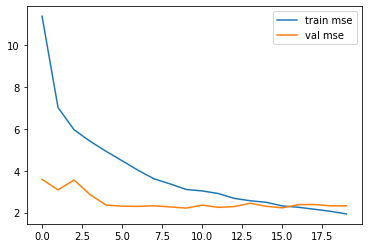

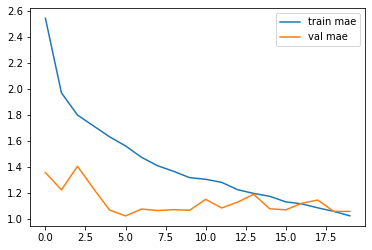

In [ ]:
plt.plot(history.history['loss'], label='train mse')      #CHANGE
plt.plot(history.history['val_loss'], label='val mse')      #CHANGE
plt.legend()
plt.show()
plt.plot(history.history['mae'], label='train mae')      #CHANGE
plt.plot(history.history['val_mae'], label='val mae')
plt.legend()
plt.show()

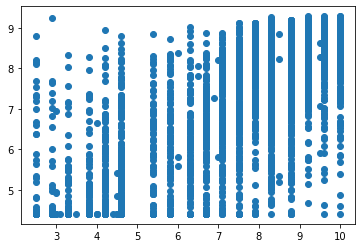

In [ ]:
import matplotlib.pyplot as plt 
y_pred_model = model_gensim_2.predict(X_test)
plt.scatter(y_test, y_pred_model)

Baseline Model MAE 2.675800879371502


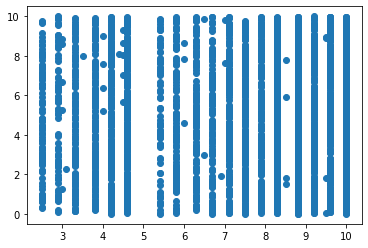

In [ ]:
# Baseline Model
print(f'Baseline Model MAE {baseline_mae}')
plt.scatter(y_test, y_pred_baseline)

In [ ]:
# 0	angry made post available via possible site us...	2.9

# pre process and convert to pad ...
X_2[0] # = sequences[0]

'angry made post available via possible site use planing trip no one make mistake booking place made booking via booking com stayed night hotel july upon arrival placed small room nd floor hotel turned not room booked specially reserved level duplex room would big window high ceiling room ok mind broken window not closed hello rain mini fridge contained sort bio weapon least guessed smell intimately asked change room explaining time booked duplex btw cost simple double got way volume due high ceiling offered room next day check next day clock order get room waned not best way begin holiday wait till order check new room wonderful waist time room got wanted peaceful internal garden view big window tired waiting room placed belonging rushed city evening turned constant noise room guess made vibrating vent tube something constant annoying hell not stop even making hard fall asleep wife audio recording not attach want send via e mail next day technician came not able determine cause distur

In [ ]:
X_pad[0] # sequences[0]
# sequences[0]

array([2365,   72, 1938,  167,  777,  636,  361,  107,  377,    9,   21,
        124,  887,   62,   74,   72,   62,  777,   62,  219,   87,   23,
          2, 2431,  433,  173,  951,   10,    1,  968,   46,    2,  524,
          4,    1,   68, 1357, 1153,  400, 2293,    1,   17,  106,   53,
        216,  554,    1,  242,  937,  234,   53,    4,  385, 2366, 1472,
        311,  290, 3307,  868,  498,  246,   78,  239,    1, 2514,   28,
         68, 2293, 4144,  267, 1287,   90,   67,  117, 2432,  197,  216,
        554,  240,    1,   69,   36,   47,   69,   36, 1790,  343,   38,
          1,    4,  176,  117, 2294,  778,  217,  706,  343,   47,  257,
          1,  301, 4601,   28,    1,   67,  264, 1473, 1430,  323,   41,
        106,   53,  241,  374,    1,  951, 2218, 2433,  258,  249,  524,
        981,   98,    1,  869,   72, 1750,   63,  371,  981,  768, 3308,
          4,  372,   42,  335,  218, 1820, 2154,  616,    4,  243, 1044,
        777,  604, 1993,   69,   36, 1994,  237,   

In [ ]:
tokenizer.word_index["broken"],   tokenizer.word_index["angry"],   # Val?/

(234, 2365)

In [ ]:
#model_gensim.predict([[X_pad[0]]])
model_gensim_2.predict(np.expand_dims(X_pad[0], axis=0))[0][0]

4.400562

In [ ]:
# 1	no real complaint hotel great great location s...	7.5

# pre process and convert to pad ...
X_pad[1] # = sequences[1]

array([   1,  101, 2965,   55,   46,  252,    4,  289,  529, 1474,  308,
        252,   13,  432,  101,   58,  252,   31, 2365, 1821,   27,  692,
       2515,    3,    4, 1655,  336,   15,   36, 1119, 3547,  422, 1022,
       1858,  902,    1, 1321, 1475,    4,    8,   25,   35,  201,  658,
        997,   60, 1751,   35,  787, 2367,  769,   46,  212,  278,   46,
        411,  252,  101,  825,  324,  286,  237,  724,  371,    1,   69,
         58,  982,   95,  169,  125,  586, 2219,  769,    2,   59,   89,
       3548,   49, 2598,    2,  362,   23,  483,   60, 1751,   23, 1656,
        168,  240,  302,  353,    1,  375,  237,  422,  235,   83,  982,
        478,    8,  282,  119,   11,    5,   13, 1685,   26,   40,   13,
         37, 3310,   43,   89,   35,   92,  751,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [ ]:
model_gensim_2.predict(np.expand_dims(X_pad[1], axis=0))[0][0]

4.7029657

In [ ]:
sentence_test = "I really liked the hotel. Everything was amazing, thanks for all"

sentence_test =  tokenizer.texts_to_sequences([sentence_test])
sentence_test = pad_sequences(sentence_test, dtype='int32', padding='post', maxlen=X_pad[0].shape[0])
sentence_test

model_gensim_2.predict(np.expand_dims(sentence_test[0], axis=0))[0][0]

9.151367

In [ ]:
sentence_test = "The hotel was horrible. We had prostitues fihgts and blod over the bed. Everything was brokend and smelly"

sentence_test =  tokenizer.texts_to_sequences([sentence_test])
sentence_test = pad_sequences(sentence_test, dtype='int32', padding='post', maxlen=X_pad[0].shape[0])
sentence_test

model_gensim_2.predict(np.expand_dims(sentence_test[0], axis=0))[0][0]

4.404791

In [ ]:
sentence_test = "Great vacation until we tried to travel home. We tried calling and waited more than 2 hours for a callback and then they were unable/unwilling to help us. Stranded for 48 hours because of this company with no help rebooking flights. We are out for hotel, food, and time off work because I was hung up on repeatedly by their customer service department. Once I was finally home, they told me there's nothing they can do for me that they were really sorry all this happened. They were unwilling to make it right, but told me that I could have requested a refund for my flight home if I would have been able to reach them at the time."

sentence_test =  tokenizer.texts_to_sequences([sentence_test])
sentence_test = pad_sequences(sentence_test, dtype='int32', padding='post', maxlen=X_pad[0].shape[0])
sentence_test

model_gensim_2.predict(np.expand_dims(sentence_test[0], axis=0))[0][0]

4.8320665

In [ ]:
sentence_test = "single rooms like hospital rooms single rooms hotel sparse intentional know ugly like trapped hospital white walls sink basin room small rectangle shape.the beds hard rocks blankets rough really noisy.this overrated hotel stayed fan stype hotels,  "

sentence_test =  tokenizer.texts_to_sequences([sentence_test])
sentence_test = pad_sequences(sentence_test, dtype='int32', padding='post', maxlen=X_pad[0].shape[0])
sentence_test

model_gensim_2.predict(np.expand_dims(sentence_test[0], axis=0))[0][0]

4.400562

# Export

In [ ]:
# import pickle

# # Export pipeline as pickle file
# with open("pipeline.pkl", "wb") as file:
#     pickle.dump(best_pipeline, file)